In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

## Model description

The BernoulliNB (Bernoulli Naive Bayes) machine learning model is a supervised classification algorithm based on Bayes' theorem. It is often used for text classification tasks, such as categorizing emails as spam or non-spam, or analyzing the sentiment of online comments.

The BernoulliNB model assumes that the features of the input data are binary, i.e. they take Boolean values (0 or 1), so as we have continuous data, we need to choose a threshold. 

The algorithm calculates the probability that each class (or label) is associated with a given set of features, using Bayes' theorem. The BernoulliNB model is "naive" because it assumes that all features are independent of each other.

## Data preparation

In [2]:
df=pd.read_csv("/Users/clemence/IRONHACK/Labs-Ironhack/module_3/Project_week_7/data.csv")

In [3]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
#no missing values
#right type of values

In [6]:
pd.set_option('display.max_columns', None)
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [7]:
#cleaning column names

In [8]:
df.columns = df.columns.str.lstrip()

In [9]:
df.columns = df.columns.str.rstrip()

In [10]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [11]:
#columns names are cleaned

In [12]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [13]:
#very imbalanced data

In [14]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

0


In [15]:
#Check low variance
import numpy as np
low_variance = []

for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']


In [16]:
df["Liability-Assets Flag"].value_counts()

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64

In [17]:
df["Net Income Flag"].value_counts()

1    6819
Name: Net Income Flag, dtype: int64

In [18]:
df.drop(["Liability-Assets Flag","Net Income Flag"],axis=1,inplace=True)

In [19]:
#Check the correlations
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
s = corr.unstack()
so = s.sort_values(kind="quicksort")
print(so)
#two features are totally correlated so we need to drop one of these
df = df.drop(columns=["Debt ratio %"])

Net worth/Assets                       Debt ratio %                            -1.000000
Debt ratio %                           Net worth/Assets                        -1.000000
Net worth/Assets                       Current Liability to Assets             -0.842583
Current Liability to Assets            Net worth/Assets                        -0.842583
Net Income to Stockholder's Equity     Borrowing dependency                    -0.806478
                                                                                  ...   
Current Liabilities/Equity             Current Liabilities/Equity               1.000000
                                       Current Liability to Equity              1.000000
Long-term Liability to Current Assets  Long-term Liability to Current Assets    1.000000
Degree of Financial Leverage (DFL)     Degree of Financial Leverage (DFL)       1.000000
Equity to Liability                    Equity to Liability                      1.000000
Length: 8836, dtype: 

In [20]:
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis=1)

In [21]:
#Now we can train test split
def split_data(X, y, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [23]:
#To deal with imbalanced data, we use the smote method
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [24]:
X_sm, y_sm = smote.fit_resample(X_train, y_train) 
y_sm.value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

In [25]:
#Scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)


## BernoulliNB

In [26]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=1.0,binarize=0.5) #alpha is a smoothing parameter (1 means Laplace method)
                                                                #binarize aims to set the threshold 
bnb.fit(X_train_scaled, y_train)


BernoulliNB(binarize=0.5)

In [27]:
y_pred_test = bnb.predict(X_test_scaled) # predict test
y_pred_train=bnb.predict(X_train_scaled) # predict train (for sanity checks)


In [28]:
#Evaluation 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.3f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [29]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.869,0.881
1,Precision,0.160,0.212
2,Recall,0.763,0.804


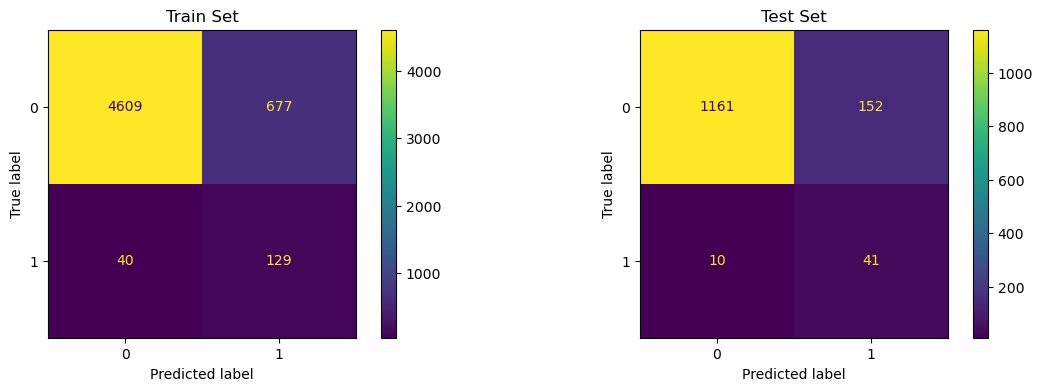

In [30]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(bnb,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(bnb,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [31]:
#trying with other parameters
bnb2 = BernoulliNB(alpha=0.5,binarize=0.5) #changing alpha to use Lidstone method
bnb2.fit(X_train_scaled, y_train)
y_pred_test = bnb2.predict(X_test_scaled) 
y_pred_train=bnb2.predict(X_train_scaled)
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.865,0.875
1,Precision,0.158,0.204
2,Recall,0.769,0.804


In [32]:
#doesn't change anything

In [33]:
bnb3 = BernoulliNB(alpha=0,binarize=0.5) #no smoothing
bnb3.fit(X_train_scaled, y_train)
y_pred_test = bnb3.predict(X_test_scaled) 
y_pred_train=bnb3.predict(X_train_scaled)
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.863,0.870
1,Precision,0.156,0.190
2,Recall,0.781,0.765


In [34]:
#same

In [35]:
bnb4 = BernoulliNB(alpha=0,binarize=0.35) #no smoothing #changing the binarize boundary
bnb4.fit(X_train_scaled, y_train)
y_pred_test = bnb4.predict(X_test_scaled) 
y_pred_train=bnb4.predict(X_train_scaled)
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.834,0.833
1,Precision,0.138,0.161
2,Recall,0.834,0.824


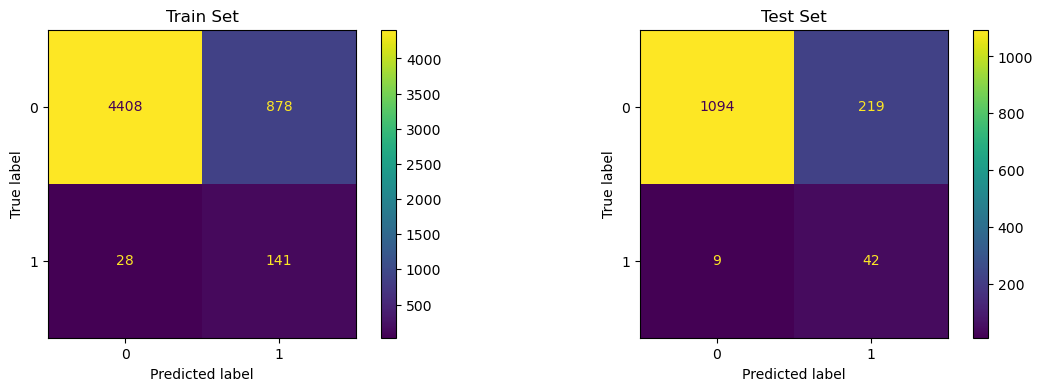

In [36]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(bnb4,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(bnb4,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [37]:
bnb5 = BernoulliNB(alpha=0,binarize=0.3) #no smoothing #changing the binarize boundary
bnb5.fit(X_train_scaled, y_train)
y_pred_test = bnb5.predict(X_test_scaled) 
y_pred_train=bnb5.predict(X_train_scaled)
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.824,0.821
1,Precision,0.132,0.157
2,Recall,0.840,0.863


In [38]:
#I choose to use the bnb parameters

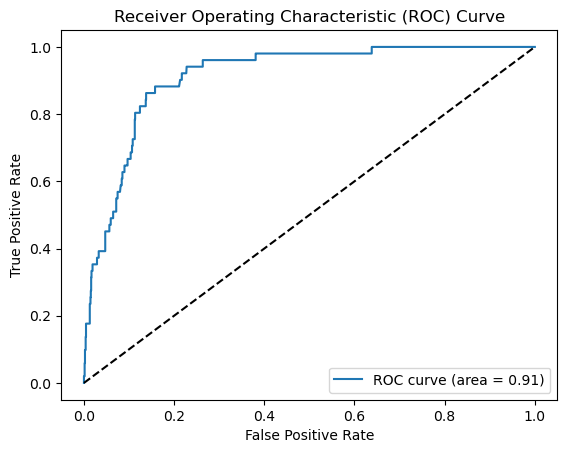

In [39]:
# Predict probabilities for the test set
probs = bnb.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
#Check the most important features
coefs = bnb.coef_
coefs

array([[-4.44851638, -5.14166356, -4.44851638, -2.2512918 , -2.2512918 ,
        -5.14166356, -5.14166356, -5.14166356, -5.14166356, -5.14166356,
        -1.4527841 , -1.5040774 , -3.7553692 , -4.04305127, -2.36907483,
        -3.53222564, -3.53222564, -3.53222564, -5.14166356, -2.94443898,
        -5.14166356, -4.04305127, -5.14166356, -3.7553692 , -5.14166356,
        -5.14166356, -5.14166356, -5.14166356, -2.0506211 , -5.14166356,
        -5.14166356, -2.19722458, -5.14166356, -4.44851638, -2.94443898,
        -4.44851638, -3.19575341, -3.34990409, -0.78495473, -3.53222564,
        -4.04305127, -5.14166356, -1.13433037, -1.96360973, -4.44851638,
        -5.14166356, -1.35747392, -1.29151595, -1.61530303, -4.44851638,
        -4.04305127, -5.14166356, -2.65675691, -1.80945905, -1.27046255,
        -2.94443898, -5.14166356, -2.65675691, -0.38807337, -3.7553692 ,
        -2.83907846, -3.7553692 , -1.06412611, -3.53222564, -0.96727629,
        -4.04305127, -4.44851638, -5.14166356, -1.0

## With only best features

In [41]:
def plot_feature_importances(model, X_train):
    # Get absolute value of coefficients
    coefs = np.abs(model.coef_)
    
    # Normalize coefficients
    coefs /= np.sum(coefs)
    
    # Sort coefficients by importance
    sorted_idx = np.argsort(coefs)[0]
    
    # Get feature names
    feature_names = X_train.columns.values
    
    plt.figure(figsize=(18, 12))
    # Plot horizontal bar chart of feature importances
    plt.barh(range(len(sorted_idx)), coefs[0][sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
    # set the tick label font size and other parameters
    plt.tick_params(axis='both', which='major', labelsize=6, length=6, width=2, direction='out', pad=8)

    plt.xlabel('Normalized Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()

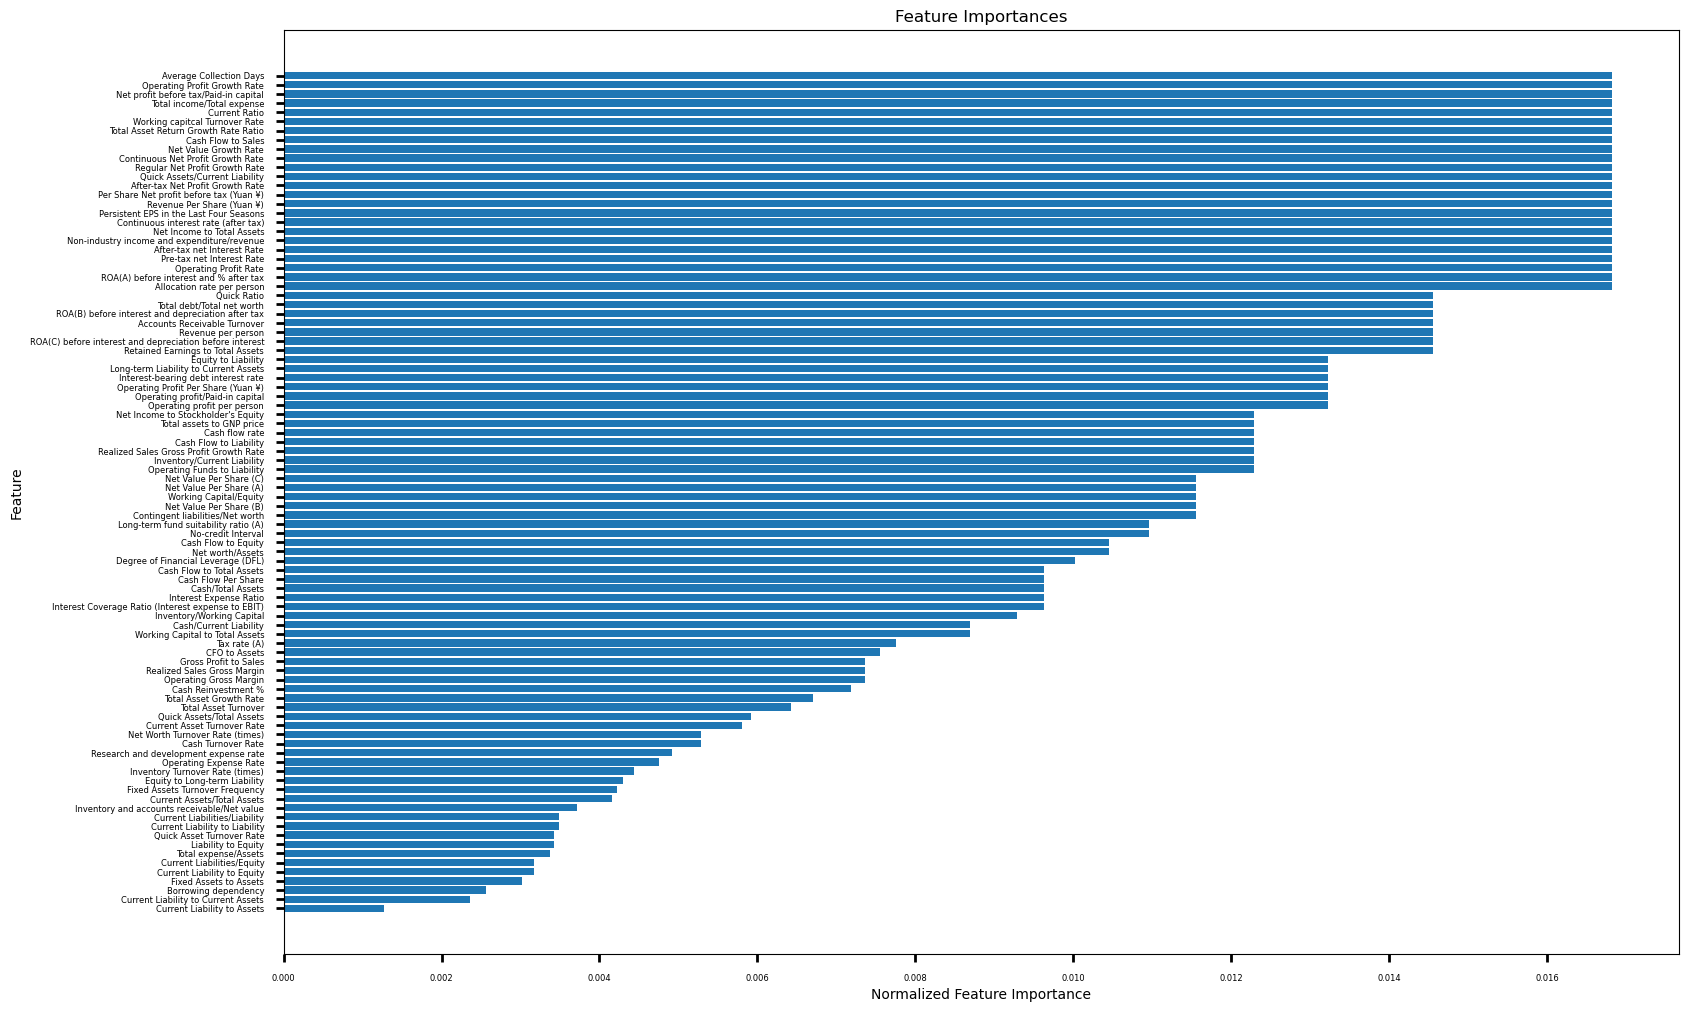

In [42]:
plot_feature_importances(bnb, X_train)

In [43]:
def feature_iteration(X_train,X_test, y_train, y_test, coefs):
    features_df= pd.DataFrame(coefs, index=X.columns.tolist())
    performance_log_n = {'Error_metric': ['Accuracy','Precision','Recall']}
    for n in range(10,len(coefs),10):
        # define n features
        features=features_df.nlargest(n,[0]).index.to_list()
        X_train_n=X_train[features]
        X_test_n=X_test[features]
        #Scale and fit data
        scaler= StandardScaler()
        scaler.fit(X_train_n)
        X_train_scaled=scaler.transform(X_train_n)
        X_test_scaled=scaler.transform(X_test_n)
        # as only 2 outcomes for target, the transforamtion returns one single columns
        bnb.fit(X_train_scaled, y_train)
        y_pred_train=bnb.predict(X_train_scaled)
        y_pred_test=bnb.predict(X_test_scaled)
        performance_log_n['Test_'+str(n)]=[accuracy_score(y_test, y_pred_test),
                                                precision_score(y_test, y_pred_test),
                                                recall_score(y_test, y_pred_test)]
        #print(f'no. of features {n} {performance_log_n}')
    return pd.DataFrame(performance_log_n)
feature_iteration(X_train,X_test, y_train, y_test, coefs[0])

,Error_metric,Test_10,Test_20,Test_30,Test_40,Test_50,Test_60,Test_70,Test_80,Test_90
0,Accuracy,0.921,0.917,0.924,0.912,0.908,0.911,0.893,0.888,0.883
1,Precision,0.206,0.196,0.232,0.215,0.205,0.216,0.209,0.203,0.203
2,Recall,0.392,0.392,0.451,0.510,0.510,0.529,0.667,0.686,0.725


<AxesSubplot:>

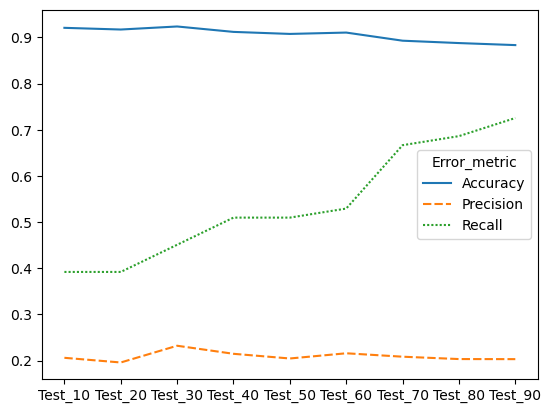

In [44]:
df_by_features=feature_iteration(X_train,X_test, y_train, y_test, coefs[0])
# set index
df_by_features.set_index('Error_metric',inplace=True)
# plot transposed df
sns.lineplot(data=df_by_features.transpose() )

In [45]:
features_df= pd.DataFrame(coefs[0], index=X.columns.tolist())
features=features_df.nlargest(70,[0]).index.to_list()

In [46]:
df[features]

,Current Liability to Assets,Current Liability to Current Assets,Borrowing dependency,Fixed Assets to Assets,Current Liabilities/Equity,Current Liability to Equity,Total expense/Assets,Quick Asset Turnover Rate,Liability to Equity,Current Liabilities/Liability,Current Liability to Liability,Inventory and accounts receivable/Net value,Current Assets/Total Assets,Fixed Assets Turnover Frequency,Equity to Long-term Liability,Inventory Turnover Rate (times),Operating Expense Rate,Research and development expense rate,Net Worth Turnover Rate (times),Cash Turnover Rate,Current Asset Turnover Rate,Quick Assets/Total Assets,Total Asset Turnover,Total Asset Growth Rate,Cash Reinvestment %,Operating Gross Margin,Realized Sales Gross Margin,Gross Profit to Sales,CFO to Assets,Tax rate (A),Working Capital to Total Assets,Cash/Current Liability,Inventory/Working Capital,Cash Flow Per Share,Interest Expense Ratio,Cash/Total Assets,Cash Flow to Total Assets,Interest Coverage Ratio (Interest expense to EBIT),Degree of Financial Leverage (DFL),Net worth/Assets,Cash Flow to Equity,Long-term fund suitability ratio (A),No-credit Interval,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Contingent liabilities/Net worth,Working Capital/Equity,Cash flow rate,Realized Sales Gross Profit Growth Rate,Operating Funds to Liability,Inventory/Current Liability,Cash Flow to Liability,Total assets to GNP price,Net Income to Stockholder's Equity,Interest-bearing debt interest rate,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,Operating profit per person,Long-term Liability to Current Assets,Equity to Liability,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Revenue per person,Retained Earnings to Total Assets,ROA(A) before interest and % after tax,Operating Profit Rate
0,0.147,0.118,0.390,0.424,0.339,0.339,0.065,6550000000.000,0.290,0.676,0.676,0.398,0.191,0.000,0.127,0.000,0.000,0.000,0.033,458000000.000,701000000.000,0.167,0.087,4980000000.000,0.364,0.601,0.601,0.601,0.520,0.000,0.673,0.000,0.277,0.312,0.630,0.004,0.638,0.564,0.027,0.792,0.313,0.005,0.623,0.148,0.148,0.148,0.006,0.721,0.458,0.022,0.334,0.001,0.459,0.009,0.828,0.001,0.096,0.096,0.393,0.026,0.016,0.371,0.406,0.001,0.021,0.002,0.034,0.903,0.424,0.999
1,0.057,0.048,0.377,0.469,0.330,0.330,0.026,7700000000.000,0.284,0.309,0.309,0.398,0.182,719000000.000,0.121,9360000000.000,0.000,0.000,0.025,2490000000.000,0.000,0.127,0.064,6110000000.000,0.377,0.610,0.610,0.610,0.567,0.000,0.751,0.001,0.290,0.318,0.635,0.015,0.641,0.570,0.265,0.829,0.314,0.005,0.624,0.182,0.182,0.182,0.006,0.732,0.462,0.022,0.341,0.005,0.459,0.008,0.840,0.001,0.094,0.094,0.392,0.024,0.021,0.464,0.517,0.004,0.013,0.001,0.007,0.931,0.538,0.999
2,0.098,0.025,0.379,0.276,0.335,0.335,0.021,0.001,0.290,0.446,0.446,0.407,0.603,2650000000.000,0.118,65000000.000,0.000,25500000.000,0.013,761000000.000,0.002,0.340,0.015,7280000000.000,0.369,0.601,0.601,0.601,0.538,0.000,0.830,5340000000.000,0.277,0.307,0.630,0.001,0.643,0.564,0.027,0.792,0.315,0.005,0.624,0.178,0.178,0.194,0.007,0.743,0.459,0.023,0.337,0.014,0.459,0.040,0.837,0.001,0.092,0.092,0.382,0.004,0.016,0.426,0.472,0.005,0.021,0.001,0.029,0.910,0.499,0.999
3,0.099,0.067,0.380,0.559,0.332,0.332,0.024,6050000000.000,0.282,0.616,0.616,0.398,0.226,9150000000.000,0.121,7130000000.000,0.000,0.000,0.028,2030000000.000,8140000000.000,0.162,0.090,4880000000.000,0.384,0.584,0.584,0.584,0.604,0.000,0.726,0.001,0.277,0.322,0.630,0.019,0.579,0.565,0.027,0.849,0.302,0.005,0.623,0.154,0.154,0.154,0.005,0.730,0.466,0.022,0.349,0.004,0.449,0.003,0.835,0.000,0.078,0.078,0.378,0.022,0.024,0.400,0.458,0.003,0.010,0.002,0.015,0.907,0.451,0.999
4,0.110,0.048,0.375,0.310,0.331,0.331,0.026,5050000000.000,0.279,0.975,0.975,0.400,0.358,0.000,0.111,0.000,7890000000.000,0.000,0.040,824000000.000,6680000000.000,0.260,0.175,5510000000.000,0.

In [47]:
new_df=pd.concat([df[features],y],axis=1)

In [48]:
new_df.head()

,Current Liability to Assets,Current Liability to Current Assets,Borrowing dependency,Fixed Assets to Assets,Current Liabilities/Equity,Current Liability to Equity,Total expense/Assets,Quick Asset Turnover Rate,Liability to Equity,Current Liabilities/Liability,Current Liability to Liability,Inventory and accounts receivable/Net value,Current Assets/Total Assets,Fixed Assets Turnover Frequency,Equity to Long-term Liability,Inventory Turnover Rate (times),Operating Expense Rate,Research and development expense rate,Net Worth Turnover Rate (times),Cash Turnover Rate,Current Asset Turnover Rate,Quick Assets/Total Assets,Total Asset Turnover,Total Asset Growth Rate,Cash Reinvestment %,Operating Gross Margin,Realized Sales Gross Margin,Gross Profit to Sales,CFO to Assets,Tax rate (A),Working Capital to Total Assets,Cash/Current Liability,Inventory/Working Capital,Cash Flow Per Share,Interest Expense Ratio,Cash/Total Assets,Cash Flow to Total Assets,Interest Coverage Ratio (Interest expense to EBIT),Degree of Financial Leverage (DFL),Net worth/Assets,Cash Flow to Equity,Long-term fund suitability ratio (A),No-credit Interval,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Contingent liabilities/Net worth,Working Capital/Equity,Cash flow rate,Realized Sales Gross Profit Growth Rate,Operating Funds to Liability,Inventory/Current Liability,Cash Flow to Liability,Total assets to GNP price,Net Income to Stockholder's Equity,Interest-bearing debt interest rate,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,Operating profit per person,Long-term Liability to Current Assets,Equity to Liability,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Revenue per person,Retained Earnings to Total Assets,ROA(A) before interest and % after tax,Operating Profit Rate,Bankrupt?
0,0.147,0.118,0.390,0.424,0.339,0.339,0.065,6550000000.000,0.290,0.676,0.676,0.398,0.191,0.000,0.127,0.000,0.000,0.000,0.033,458000000.000,701000000.000,0.167,0.087,4980000000.000,0.364,0.601,0.601,0.601,0.520,0.000,0.673,0.000,0.277,0.312,0.630,0.004,0.638,0.564,0.027,0.792,0.313,0.005,0.623,0.148,0.148,0.148,0.006,0.721,0.458,0.022,0.334,0.001,0.459,0.009,0.828,0.001,0.096,0.096,0.393,0.026,0.016,0.371,0.406,0.001,0.021,0.002,0.034,0.903,0.424,0.999,1
1,0.057,0.048,0.377,0.469,0.330,0.330,0.026,7700000000.000,0.284,0.309,0.309,0.398,0.182,719000000.000,0.121,9360000000.000,0.000,0.000,0.025,2490000000.000,0.000,0.127,0.064,6110000000.000,0.377,0.610,0.610,0.610,0.567,0.000,0.751,0.001,0.290,0.318,0.635,0.015,0.641,0.570,0.265,0.829,0.314,0.005,0.624,0.182,0.182,0.182,0.006,0.732,0.462,0.022,0.341,0.005,0.459,0.008,0.840,0.001,0.094,0.094,0.392,0.024,0.021,0.464,0.517,0.004,0.013,0.001,0.007,0.931,0.538,0.999,1
2,0.098,0.025,0.379,0.276,0.335,0.335,0.021,0.001,0.290,0.446,0.446,0.407,0.603,2650000000.000,0.118,65000000.000,0.000,25500000.000,0.013,761000000.000,0.002,0.340,0.015,7280000000.000,0.369,0.601,0.601,0.601,0.538,0.000,0.830,5340000000.000,0.277,0.307,0.630,0.001,0.643,0.564,0.027,0.792,0.315,0.005,0.624,0.178,0.178,0.194,0.007,0.743,0.459,0.023,0.337,0.014,0.459,0.040,0.837,0.001,0.092,0.092,0.382,0.004,0.016,0.426,0.472,0.005,0.021,0.001,0.029,0.910,0.499,0.999,1
3,0.099,0.067,0.380,0.559,0.332,0.332,0.024,6050000000.000,0.282,0.616,0.616,0.398,0.226,9150000000.000,0.121,7130000000.000,0.000,0.000,0.028,2030000000.000,8140000000.000,0.162,0.090,4880000000.000,0.384,0.584,0.584,0.584,0.604,0.000,0.726,0.001,0.277,0.322,0.630,0.019,0.579,0.565,0.027,0.849,0.302,0.005,0.623,0.154,0.154,0.154,0.005,0.730,0.466,0.022,0.349,0.004,0.449,0.003,0.835,0.000,0.078,0.078,0.378,0.022,0.024,0.400,0.458,0.003,0.010,0.002,0.015,0.907,0.451,0.999,1
4,0.110,0.048,0.375,0.310,0.331,0.331,0.026,5050000000.000,0.279,0.975,0.975,0.400,0.358,0.000,0.111,0.000,7890000000.000,0.000,0.040,824000000.000,6680000000.000,0.260,0.175

In [49]:
new_df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [50]:
y=new_df["Bankrupt?"]
X = new_df.drop(['Bankrupt?'], axis=1)

In [52]:
X_train_new, X_test_new, y_train_new, y_test_new = split_data(X, y)

In [53]:
smote = SMOTE()
X_sm_new, y_sm_new = smote.fit_resample(X_train_new, y_train_new) 
y_sm_new.value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

In [54]:
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_train_scaled_new =pd.DataFrame(X_train_scaled_new, columns=X_train_new.columns)

X_test_scaled_new = scaler.transform(X_test_new)
X_test_scaled_new=pd.DataFrame(X_test_scaled_new, columns=X_test_new.columns)

In [55]:
bnb.fit(X_train_scaled_new, y_train_new)
y_pred_test_new = bnb.predict(X_test_scaled_new) 
y_pred_train_new=bnb.predict(X_train_scaled_new)
error_metrics_new_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train_new, y_pred_train_new,y_test_new, y_pred_test_new)
print("With 70 features")
error_metrics_new_df

With 70 features


,Error_metric,Train,Test
0,Accuracy,0.891,0.893
1,Precision,0.183,0.209
2,Recall,0.722,0.667


In [56]:
print("All features")
error_metrics_df

All features


,Error_metric,Train,Test
0,Accuracy,0.824,0.821
1,Precision,0.132,0.157
2,Recall,0.840,0.863


In [ ]:
#recall is better in the model with all features / precision is better in the model with best features / accuracy remains the same

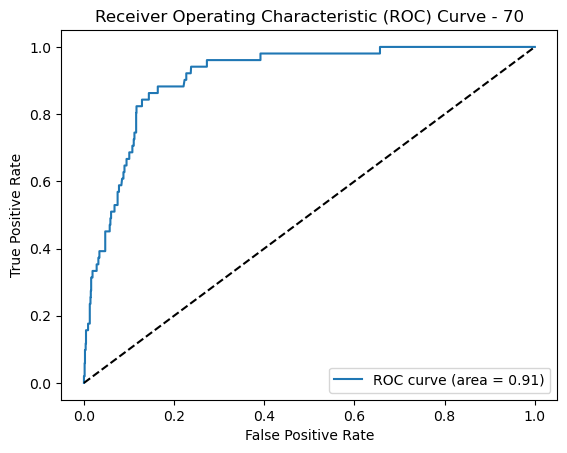

In [57]:
# Predict probabilities for the test set
probs = bnb.predict_proba(X_test_scaled_new)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_new, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - 70')
plt.legend(loc='lower right')
plt.show()

# HistGradientBoostingClassifier

## Model description

It belongs to the family of boosting algorithms, which involve combining several weak models to create a strong model.The term "hist" in HistGradientBoostingClassifier refers to the fact that this algorithm uses histograms to speed up the training process. Instead of computing gradients for every single instance in the training data, the algorithm builds histograms of the features to group similar instances together. This allows it to reduce the number of computations required and speeds up the training process.

The algorithm works by iteratively adding weak decision trees to the ensemble and optimizing them to minimize the loss function. Each new tree is trained on the errors made by the previous trees, with the aim of reducing those errors. The final prediction is made by taking a weighted average of the predictions of all the trees in the ensemble.

In [58]:
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis=1)

In [59]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [60]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train) 
y_sm.value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

In [61]:
#Scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'max_iter': [100, 200, 300]
}

hgb = HistGradientBoostingClassifier()

grid_search = GridSearchCV(hgb, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

In [63]:
best_params

{'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 300}

In [64]:
hgb = HistGradientBoostingClassifier(**best_params)
hgb.fit(X_train_scaled, y_train)
y_pred_test = hgb.predict(X_test_scaled) 
y_pred_train=hgb.predict(X_train_scaled) 

In [65]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,1.000,0.967
1,Precision,1.000,0.650
2,Recall,1.000,0.255


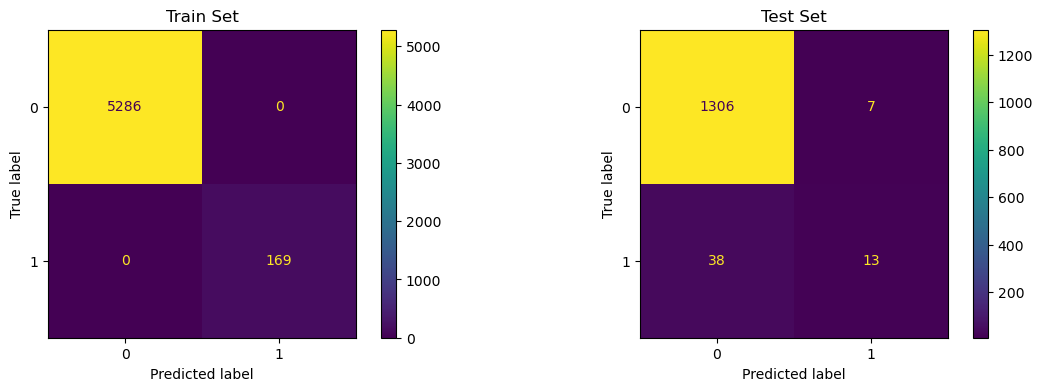

In [66]:

fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(hgb,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(hgb,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

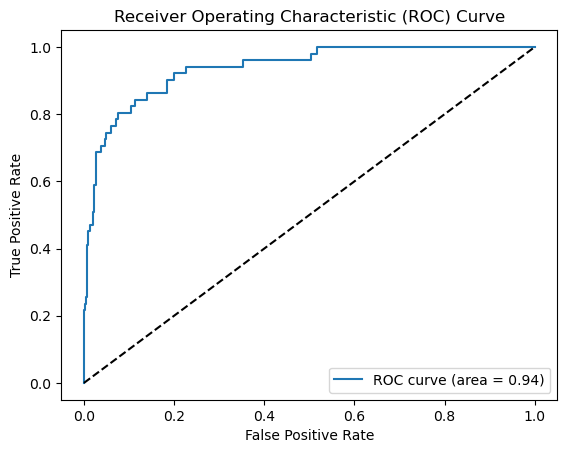

In [67]:
# Predict probabilities for the test set
probs = hgb.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [71]:
hgb2 = HistGradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_iter=200)
hgb2.fit(X_train_scaled, y_train)
y_pred_test = hgb2.predict(X_test_scaled) 
y_pred_train=hgb2.predict(X_train_scaled) 

In [72]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,1.000,0.970
1,Precision,1.000,0.750
2,Recall,1.000,0.294


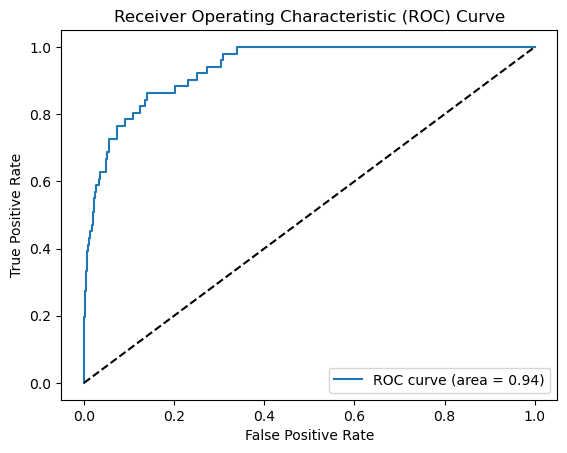

In [73]:
# Predict probabilities for the test set
probs = hgb2.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [91]:
feature_iteration(X_train_scaled,X_test_scaled, y_train, y_test, coefs[0])

,Error_metric,Test_10,Test_20,Test_30,Test_40,Test_50,Test_60,Test_70,Test_80,Test_90
0,Accuracy,0.921,0.917,0.924,0.912,0.908,0.911,0.893,0.888,0.883
1,Precision,0.206,0.196,0.232,0.215,0.205,0.216,0.209,0.203,0.203
2,Recall,0.392,0.392,0.451,0.510,0.510,0.529,0.667,0.686,0.725


<AxesSubplot:>

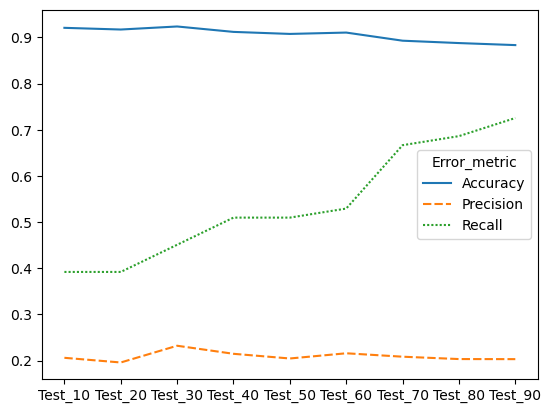

In [92]:
df_by_features=feature_iteration(X_train_scaled,X_test_scaled, y_train, y_test, coefs[0])
# set index
df_by_features.set_index('Error_metric',inplace=True)
# plot transposed df
sns.lineplot(data=df_by_features.transpose() )

In [103]:
selector = SelectKBest(mutual_info_classif, k=60)
selector.fit(X_train_scaled, y_train)

    # transform the original feature set to include only the selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

    # train and evaluate the model using the selected features
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train_selected, y_train)
y_pred_test = hgb.predict(X_test_selected)
y_pred_train = hgb.predict(X_train_selected)

In [104]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred_test)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,1.000,0.969
1,Precision,1.000,0.737
2,Recall,1.000,0.275


In [96]:
features_df= pd.DataFrame(coefs[0], index=X.columns.tolist())
features=features_df.nlargest(60,[0]).index.to_list()
new_df=pd.concat([df[features],y],axis=1)

In [97]:
y=new_df["Bankrupt?"]
X = new_df.drop(['Bankrupt?'], axis=1)
X_train_new, X_test_new, y_train_new, y_test_new = split_data(X, y)
smote = SMOTE()
X_sm_new, y_sm_new = smote.fit_resample(X_train_new, y_train_new) 
y_sm_new.value_counts()

0    5286
1    5286
Name: Bankrupt?, dtype: int64

In [98]:
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_train_scaled_new =pd.DataFrame(X_train_scaled_new, columns=X_train_new.columns)

X_test_scaled_new = scaler.transform(X_test_new)
X_test_scaled_new=pd.DataFrame(X_test_scaled_new, columns=X_test_new.columns)

In [101]:
hgb.fit(X_train_scaled_new, y_train_new)
y_pred_test_new = hgb.predict(X_test_scaled_new) 
y_pred_train_new=hgb.predict(X_train_scaled_new)
error_metrics_new_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train_new, y_pred_train_new,y_test_new, y_pred_test_new)
print("With 60 features")
error_metrics_new_df

With 60 features


,Error_metric,Train,Test
0,Accuracy,1.000,0.968
1,Precision,1.000,0.833
2,Recall,1.000,0.196
